 # Elemento triangular de 3 nodos en elasticidad plana

Análisis de Estructuras. Grado en Ingeniería Civil. 

Autores: 

+ Alejandro E. Martínez-Castro, Esther Puertas García, Rafael Gallego.
+ Departamento de Mecánica de Estructuras e Ingeniería Hidráulica. Universidad de Granada.


<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Cuadernos MEF: Elemento Triangular de 3 nodos</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Alejandro Martínez Castro, Esther Puertas García, Rafael Gallego Sevilla</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Reconocimiento-NoComercial-CompartirIgual 4.0 Internacional License</a>.

## Formulación en un elemento

La formulación del MEF para un elemento parte de la expresión del PTV. 

\begin{equation}
\int_{\Omega} \boldsymbol{\sigma}^T \cdot \boldsymbol{\varepsilon}^* \, d\Omega = \int_{\Gamma} \mathbf{t}^t \cdot \mathbf{u}^* \,d \Gamma + \int_{\Omega} \mathbf{b}^T \,\cdot \, \mathbf{u}^* \,d \Omega + \sum_{k=1}^n \mathbf{F}_k^T \,\mathbf{u}_k^*
\end{equation}

El siguiente paso consiste en plantear una discretización para el campo $\mathbf{u}$, mediante funciones de forma, en función de un vector de grados de libertad $\mathbf{a}$. 

\begin{equation}
\mathbf{u} = \mathbf{N}\cdot \mathbf{a}
\end{equation}

Esta relación inducirá una relación para el vector $\boldsymbol{\varepsilon}$, 

\begin{equation}
\boldsymbol{\varepsilon} = \mathbf{B}\cdot \mathbf{a}
\end{equation}

Eligiendo alternativamente $\mathbf{u^*} = N_i(x,y)$ se obtendrá un conjunto de ecuaciones que formará el sistema matricial dentro de un elemento: 

\begin{equation}
\mathbf{K}\cdot \mathbf{a} = \int_{\Gamma} \mathbf{N}^T \cdot \mathbf{t} \,d \Gamma + \int_{\Omega} \mathbf{N}^T \,\cdot \, \mathbf{b} \,d \Omega + \mathbf{F_n} = \mathbf{f}_t + \mathbf{f}_b + \mathbf{F_n}
\end{equation}

Siendo $\mathbf{F_n}$ el vector de fuerzas nodales, el cual se cancela entre elementos en el ensamblaje. Estas fuerzas nodales tienen dimensiones de fuerza por unidad de longitud (en $z$). 

Se ha asumido que los desplazamientos son continuos, y que las funciones de forma $N_i(x,y)$ toman valor $1$ en el nodo $i$ y cero en el resto. 



## Discretización y funciones de forma. 

El elemento más sencillo para elasticidad es el elemento triangular de 3 nodos. 

Consideremos un elemento de 3 nodos: 
- Las coordenadas de los 3 vértices son $(x_1, y_1)$, $(x_2,y_2)$, $(x_3,y_3)$. 
- Los desplazamientos se interpolan a partir de $(u_1,v_1)$, $(u_2,v_2)$, $(u_3,v_3)$. 

\begin{equation}
\begin{pmatrix} u \\ v \end{pmatrix} = 
\left[
\begin{matrix}
N_1 & 0 & N_2 & 0 & N_3 & 0 \\
0 & N_1 & 0 & N_2 & 0 & N_3 
\end{matrix}
\right] \cdot \begin{pmatrix} u_1 \\ v_1 \\ u_2 \\ v_2 \\ u_3 \\ v_3 \end{pmatrix}
\end{equation}

Esta matriz genera la relación $\mathbf{u} = \mathbf{N}\,\cdot\mathbf{a}$.

Las funciones $N_1$, $N_2$ y $N_3$ pueden obtenerse de manera análoga a como se hizo en vigas. 

La base en este caso es la $\mathcal{B} = \lbrace 1, x, y \rbrace$. 

In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 0.7.6.1 (Python 2.7.11-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://www.sympy.org


In [2]:
base = Matrix([[1,x,y]])
base

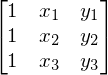

In [3]:
x1,y1,x2,y2,x3,y3 = symbols('x1 y1 x2 y2 x3 y3')
matM = Matrix.vstack(base.subs([(x,x1),(y,y1)]),base.subs([(x,x2),(y,y2)]),base.subs([(x,x3),(y,y3)]))
matM

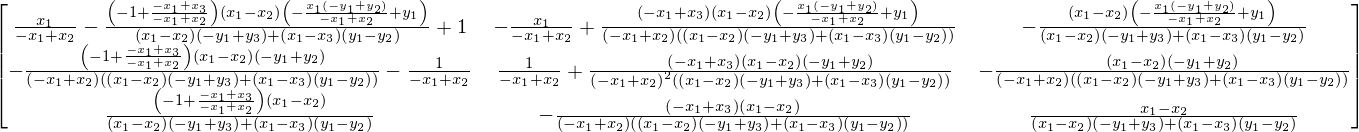

In [4]:
Inv_matM = matM.inv()
Inv_matM

Esta expresión resulta más sencilla si se obtiene la inversa mediante otro procedimiento. La matriz inversa puede calcularse como la matriz de los adjuntos dividida entre el determinante. 

\begin{equation}
\mathbf{M}^{-1} = \dfrac{\mathrm{adj} \mathbf{M}^T}{|\mathbf{M}|}
\end{equation}

Esto puede hacerse en SymPy como sigue: 

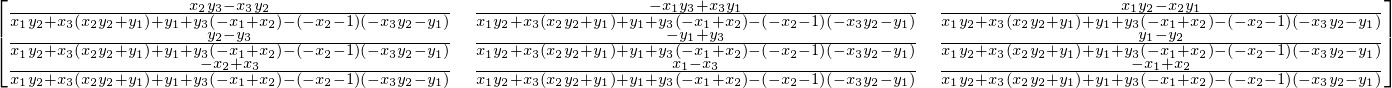

In [5]:
matM.inverse_ADJ()

La función _adjugate_ obtiene la matriz de adjuntos traspuesta. 

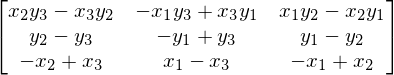

In [6]:
matM.adjugate()

Observe que en la expresión de la inversa aparece un denominador comun

In [7]:
denominador = matM.adjugate()[0,0]/matM.inverse_ADJ()[0,0]
denominador 

Simplificando

In [8]:
denominador.simplify()

Que coincide con el determinante de la matriz $\mathbf{M}$

In [9]:
matM.det()

Si se elige la numeración tal que los nodos 1-2-3 se recorren en sentido contrario a las agujas del reloj, puede demostrarse que el anterior producto coincide con módulo del producto vectorial de los vectores 1-2 y 1-3. 

En efecto. 

El vector $\mathbf{e_1}$, de $(x1,y1)$ a $(x_2,y2)$ es $\mathbf{e_1} = [x_2-x_1,y_2-y_1]^T$.

El vector $\mathbf{e_2}$, de $(x1,y1)$ a $(x_3,y3)$ es $\mathbf{e_2} = [x_3-x_1,y_3-y_1]^T$.

El producto vectorial de ambos vectores será un vector orientado en la dirección del eje $z$ positivo. La componente $z$ será positivo, porque se ha elegido según la orientación 1-2-3 con recorrido contrario a las agujas del reloj. 

El módulo del producto vectorial coincidirá por tanto con la componente z. 

Además, el módulo de este producto vectorial coincide con el área del paralelogramo formado por los dos vectores. Y a su vez, será el doble de área del triángulo formado por los puntos 1-2-3. 


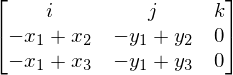

In [10]:
i,j,k = symbols('i j k')
prodvect = Matrix([[i,j,k], [x2-x1,y2-y1,0],[x3-x1,y3-y1,0]])
prodvect

In [11]:
(prodvect.det()/k).simplify()

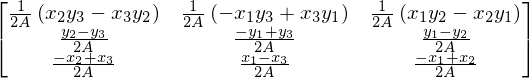

In [12]:
A = symbols('A')
Inversa = 1/(2*A) * matM.adjugate()
Inversa

La expresión de las funciones de forma es, 

In [13]:
Inv_matM = Inversa
N1 = base.dot(Inv_matM.col(0))
N2 = base.dot(Inv_matM.col(1))
N3 = base.dot(Inv_matM.col(2))
N1 = N1.simplify()
N2 = N2.simplify()
N3 = N3.simplify()

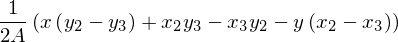

In [14]:
N1

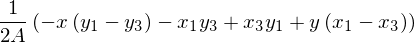

In [15]:
N2

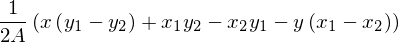

In [16]:
N3

Nótese que para que esta expresión pueda aplicarse, interpretándose $A$ como el área del triángulo con símbolo positivo, la orientación del triángulo ha de ser positiva, es decir, los puntos 1-2-3 deben orientarse en sentido antihorario. 

## Expresión del vector de deformaciones. 

El vector de deformaciones se expresa mediante el siguiente producto: 

\begin{equation}
\boldsymbol{\varepsilon} = \begin{pmatrix} \varepsilon_{nx} \\ \varepsilon_{ny} \\ \gamma_{xy} \end{pmatrix}
\end{equation}

Y en función de las funciones de forma: 

\begin{equation}
\boldsymbol{\varepsilon} = \left[ 
\begin{matrix}
\dfrac{\partial N_1}{\partial x} & 0 & \dfrac{\partial N_2}{\partial x} & 0 & \dfrac{\partial N_3}{\partial x} & 0 \\
0 & \dfrac{\partial N_1}{\partial x} & 0 & \dfrac{\partial N_2}{\partial x} & 0 & \dfrac{\partial N_3}{\partial x} \\
\dfrac{\partial N_1}{\partial y} & \dfrac{\partial N_1}{\partial x} & \dfrac{\partial N_2}{\partial y} & \dfrac{\partial N_2}{\partial x} & \dfrac{\partial N_3}{\partial y} & \dfrac{\partial N_3}{\partial x}
\end{matrix} \right] \cdot
\begin{pmatrix} u_1 \\ v_1 \\ u_2 \\ v_2 \\ u_3 \\ v_3 \end{pmatrix}
\end{equation}

Relación que puede escribirse como: $\boldsymbol{\varepsilon} = \mathbf{B} \cdot \mathbf{a}$.

La matriz $\mathbf{B}$ en este contexto se denomina _matriz de deformación_.


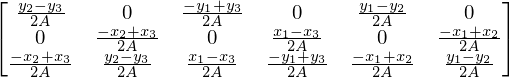

In [17]:
Nu = Matrix([[N1, 0, N2, 0, N3, 0]])
Nv = Matrix([[0, N1, 0, N2, 0, N3]])
B = Matrix.vstack(Nu.diff(x),Nv.diff(y),Nu.diff(y)+Nv.diff(x))
B

Esta matriz puede escribirse en función de seis constantes, $b_1,c_1,b_2,c_2,b_3,c_3$, como 

\begin{equation}
\mathbf{B} = \dfrac{1}{2\,A}
\left[
\begin{matrix}
b_1 & 0 & b_2 & 0 & b_3 & 0 \\
0 & c_1 & 0 & c_2 & 0 & c_3 \\
c_1 & b_1 & c_2 & b_2 & c_3 & b_3
\end{matrix}
\right] = 
\left[
\begin{matrix}
\mathbf{B_1} & \mathbf{B_2} & \mathbf{B_3}
\end{matrix}
\right]
\end{equation}

con $\mathbf{B_i} =\dfrac{1}{2\,A}\, \left[ \begin{matrix} b_i & 0 \\ 0 & c_i \\ c_i & b_i  \end{matrix} \right]$

siendo,

\begin{align}
b_1 & = y_2 - y_3 \\
b_2 & = y_3 - y_1 \\
b_3 & = y_1 - y_2 \\
c_1 & = x_3 - x_2 \\
c_2 & = x_1 - x_3 \\
c_3 & = x_2 - x_1
\end{align}

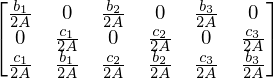

In [18]:
b1,b2,b3,c1,c2,c3 = symbols('b1 b2 b3 c1 c2 c3')
B = Matrix([[b1,0,b2,0,b3,0],
            [0,c1,0,c2,0,c3],
            [c1,b1,c2,b2,c3,b3]])
B = B / (2*A)
B

## Tensor de constantes elásticas
Para elasticidad isótropa, la matriz $\mathbf{D}$ sólo depende de tres coeficientes. 

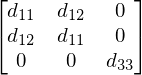

In [19]:
d11,d12,d33 = symbols('d11 d12 d33')
D = Matrix([[d11, d12, 0],[d12,d11,0],[0,0,d33]])
D

## Matriz de rigidez

\begin{equation}
\mathbf{K} = \int_{\Omega} \mathbf{B}^T \cdot \mathbf{D} \cdot \mathbf{B} \, d \Omega 
\end{equation}

Teniendo en cuenta que el tensor $\mathbf{D}$ sólo contiene constantes, y que la matriz $\mathbf{B}$ es constante dentro del elemento, la integral puede verse como la integral en el área del triángulo de una constante. Claramente, esta integral será el producto de la constante por el área del triángulo. Por tanto: 

\begin{equation}
\mathbf{K} = \mathbf{B}^T \cdot \mathbf{D} \cdot \mathbf{B} \cdot A
\end{equation}

In [20]:
krigidez = B.T.multiply(D * A).multiply(B)

La matriz de rigidez $\mathbf{K}$ puede expresarse como: 

\begin{equation}
\mathbf{K} = \left[ \begin{matrix}
\mathbf{K_{11}} & \mathbf{K_{12}} & \mathbf{K_{13}} \\
\mathbf{K_{21}} & \mathbf{K_{22}} & \mathbf{K_{23}} \\
\mathbf{K_{31}} & \mathbf{K_{32}} & \mathbf{K_{33}} \end{matrix} \right] 
\end{equation}

Con 

\begin{equation}
\mathbf{K_{ij}} = \mathbf{B_i}^T \cdot \mathbf{D} \cdot \mathbf{B_j} \,A
\end{equation}

In [21]:
k11 = krigidez[0:2,0:2]
k22 = krigidez[2:4,2:4]
k33 = krigidez[4:6,4:6]
k12 = krigidez[0:2,2:4]
k13 = krigidez[0:2,4:6]
k23 = krigidez[2:4,4:6]

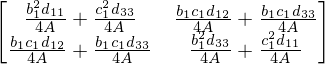

In [22]:
k11

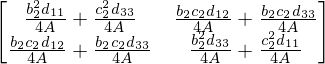

In [23]:
k22

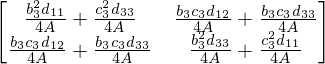

In [24]:
k33

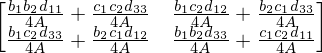

In [25]:
k12

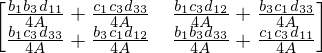

In [26]:
k13

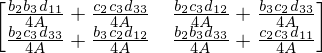

In [27]:
k23

Nótese que la matriz $\mathbf{K}$ es simétrica, lo cual no implica que se de la relación $\mathbf{K_{ij}} = \mathbf{K_{ji}}$, pues esta relación es entre matrices, y por tanto, la relación correcta es: 

\begin{equation}
\mathbf{K_{ij}} = \mathbf{K_{ji}}^T
\end{equation}

## Vector de fuerzas debido a tensiones en el contorno

En la expresión del PTV las tensiones en el contorno $\Gamma$, denominadas $\mathbf{t}$ intervienen mediante la integral: 

\begin{equation}
\mathbf{f}_t = \int_{\Gamma} \mathbf{N}^T \cdot \mathbf{t} \,d \Gamma
\end{equation}

Las fuerzas nodales se obtienen, por tanto, por integración en el elemento. 

Tras el ensamblaje, este vector sólo produce componentes no nulas cuando uno de los lados coincide con un lado cargado del sólido. 

Si el lado cargado es el 1-2, con un vector $\mathbf{t} = [t_x,t_y]^T$ constante, queda: 

\begin{equation}
\mathbf{f}_t = \dfrac{L_{12}}{2} \cdot \begin{pmatrix} t_x \\ t_y \\ t_x \\ t_y \\0 \\ 0 \end{pmatrix}
\end{equation}

donde $L_{12}$ es la longitud del lado 1-2. 

De forma análoga, si el lado cargado es el 1-3, se obtendrá: 

\begin{equation}
\mathbf{f}_t = \dfrac{L_{13}}{2} \cdot \begin{pmatrix} t_x \\ t_y \\ 0 \\ 0 \\t_x \\ t_y \end{pmatrix}
\end{equation}

Y si el lado cargado es el 2-3 se obtendrá: 

\begin{equation}
\mathbf{f}_t = \dfrac{L_{23}}{2} \cdot \begin{pmatrix} 0 \\ 0 \\ t_x \\ t_y  \\t_x \\ t_y \end{pmatrix}
\end{equation}

Puede demostrarse que, para cualquier distribución de tensiones, el elemento lineal reparte estas cargas a los dos nodos mediante la reducción del sistema de vectores deslizantes original a dos fuerzas en los nodos. Este reparto puede denominarse _isostático_ y expresa simplemente la idea básica de que las dos fuerzas equivalentes son tales que generan la misma resultante y el mismo momento que el sistema original. Bajo este punto de vista, el cálculo de las fuerzas nodales equivalentes es muy sencillo, y no requiere integración para su evaluación. 

## Vector de fuerzas debido a fuerzas volumétricas. 

En la expresión del PTV interviene el vector de fuerzas interiores, volumétricas, $\mathbf{b}$, generando fuerzas nodales equivalentes. Para un elemento: 

\begin{equation}
\mathbf{f}_b = \int_{\Omega} \mathbf{N}^T \cdot \mathbf{b} \,d \Gamma
\end{equation}

La integración genera fuerzas nodales en los tres nodos: 

\begin{equation}
\mathbf{f}_b = \dfrac{A}{3} \,\begin{pmatrix} b_x \\b_y \\b_x \\b_y \\ b_x \\ b_y \end{pmatrix}
\end{equation}

Si la fuerza por unidad de volumen corresponde al peso propio, entonces $b_x = 0$ y $b_y = - \rho \,g$, siendo $\rho$ la densidad volumétrica del material, y $g$ la constante gravitatoria. 

Por tanto, para el caso de fuerzas debidas a peso propio, se tomará: 

\begin{equation}
\mathbf{f}_b = \dfrac{A}{3} \,\begin{pmatrix} 0 \\ -\rho \,g \\ 0 \\- \rho \,g  \\ 0 \\ -\rho \,g \end{pmatrix}
\end{equation}


